<a href="https://colab.research.google.com/github/hmtayade13/tensorflow/blob/master/Predict_MPG_for_cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install seaborn

In [3]:
from __future__  import absolute_import, division, print_function

import tensorflow as tf
import tensorflow_datasets as tfds
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

print("Using tensorflow version : " + tf.__version__)

Using tensorflow version : 2.2.0


In [9]:
auto_data = tf.keras.utils.get_file('auto-mpg.data', "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
auto_data

'/root/.keras/datasets/auto-mpg.data'

In [10]:
column_names = ['MPG', 'Cylinder', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset =   pd.read_csv(auto_data, names=column_names,
                            na_values = '?', comment = '\t',
                            sep = " ", skipinitialspace = True)
dataset = raw_dataset.copy()
dataset.tail()


,MPG,Cylinder,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [12]:
dataset.isna().sum()

MPG             0
Cylinder        0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [0]:
dataset = dataset.dropna()

In [0]:
origin = dataset.pop('Origin')

In [16]:
dataset['India'] = (origin == 1 )*1.0
dataset['Germany'] = (origin == 2 )*1.0
dataset['USA'] = (origin == 3 )*1.0
dataset.tail()

,MPG,Cylinder,Displacement,Horsepower,Weight,Acceleration,Model Year,India,Germany,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [0]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


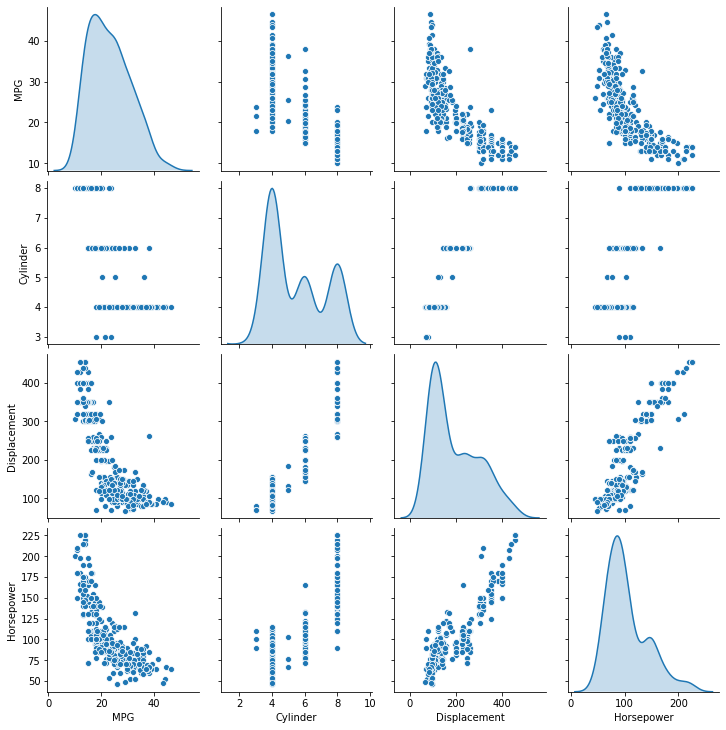

In [18]:
import seaborn as sns

sns.pairplot(train_dataset[['MPG', 'Cylinder', 'Displacement', 'Horsepower']], diag_kind = 'kde')

In [20]:
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinder,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
India,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Germany,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [0]:
train_labels = train_dataset.pop("MPG")
test_labels = test_dataset.pop("MPG")

In [0]:
def normalize(x):
  return (x - train_stats['mean']) / train_stats['std']

norm_train_data = normalize(train_dataset)
norm_test_data = normalize(test_dataset)

In [0]:
model = tf.keras.Sequential(
    [tf.keras.layers.Dense(units=64, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
    tf.keras.layers.Dense(units=64, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=1)]
    
)

In [0]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),
              loss='mse',
              metrics = ['mae', 'mse'])

In [0]:
history = model.fit(norm_train_data, train_labels, epochs=1000, verbose=0)

Training Statistics



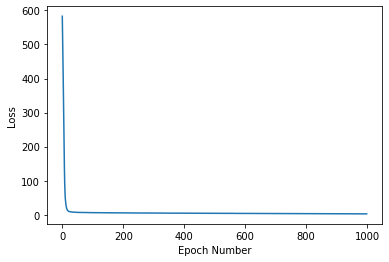

In [39]:
from matplotlib import pyplot as plt
plt.xlabel("Epoch Number")
plt.ylabel("Loss")
plt.plot(history.history["loss"])
print("Training Statistics\n")

In [0]:
predictions = model.predict(norm_test_data)

In [42]:
predictions[0]

array([14.90971], dtype=float32)

In [0]:
test_labels = test_labels.to_numpy()

In [48]:
test_labels[0]

15.0